# Test Plant

In [14]:
import requests, time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Calling synoptic for historic and current data

In [4]:
%store -r

In [5]:
mytoken = api_keys['synoptic']['public']

In [65]:
# # example 'latest' call
request = f'https://api.synopticdata.com/v2/stations/latest?state=co&within=60&token={mytoken}'
json = requests.get(request)
latest = json.json()

LAKEWOOD
39, -105

In [60]:
stations = {}
lats = []
lons = []
print(type(lons))
# for st in latest['STATION']:
#     stations[st['STID']] = (float(st['LATITUDE']), float(st['LONGITUDE']))
#     lats.append(stations[st['STID']][0])
#     lons.append(stations[st['STID']][1])

<class 'list'>


In [34]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [35]:
find_nearest(lats, 39)

38.99996

In [57]:
find_nearest(lons, -105)

-105.0

In [42]:
for st in latest['STATION']:
    stations[st['STID']] = float(st['LATITUDE'])
    lats.append(stations[st['STID']])

In [66]:
for st in latest['STATION']:
    stations[st['STID']] = float(st['LONGITUDE'])
    lons.append(stations[st['STID']])

In [67]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

In [68]:
getKeysByValue(stations, -105.0)

['E0072', 'CSU20']

In [71]:
# # example 'latest' call
request = f'https://api.synopticdata.com/v2/stations/latest?stid=CSU20&within=60&token={mytoken}'
json = requests.get(request)
csu = json.json()

In [52]:
# # example 'latest' call
request = f'https://api.synopticdata.com/v2/stations/latest?stid=D3809&within=60&token={mytoken}'
json = requests.get(request)
springs = json.json()

In [75]:
# # example 'latest' call
request = f'https://api.synopticdata.com/v2/stations/latest?stid=E0072&within=60&token={mytoken}'
json = requests.get(request)
Aurora = json.json()

# Create weather inputs

In [200]:
# YYYYMMDDhhmm
start_time = 201901010000
end_time = 202001010000
request = f'https://api.synopticdata.com/v2/stations/timeseries?stid=E0072&start={start_time}&end={end_time}&token={mytoken}'
json = requests.get(request)
Aurora = json.json()

In [179]:
Aurora

{'UNITS': {'wind_speed': 'm/s',
  'air_temp': 'Celsius',
  'elevation': 'ft',
  'wind_gust': 'm/s',
  'pressure': 'Pascals',
  'wind_direction': 'Degrees',
  'wind_chill': 'Celsius',
  'solar_radiation': 'W/m**2',
  'relative_humidity': '%',
  'sea_level_pressure': 'Pascals',
  'heat_index': 'Celsius',
  'dew_point_temperature': 'Celsius',
  'precip_accum_24_hour': 'Millimeters',
  'precip_accum_since_local_midnight': 'Millimeters',
  'position': 'ft',
  'altimeter': 'Pascals'},
 'QC_SUMMARY': {'QC_CHECKS_APPLIED': ['sl_range_check'],
  'TOTAL_OBSERVATIONS_FLAGGED': 0.0,
  'PERCENT_OF_TOTAL_OBSERVATIONS_FLAGGED': 0.0},
 'STATION': [{'STATUS': 'ACTIVE',
   'MNET_ID': '65',
   'PERIOD_OF_RECORD': {'start': '2013-01-23T00:00:00Z',
    'end': '2020-05-28T16:45:00Z'},
   'ELEVATION': '5702',
   'NAME': 'EW0072 Aurora',
   'STID': 'E0072',
   'SENSOR_VARIABLES': {'wind_speed': {'wind_speed_set_1': {}},
    'date_time': {'date_time': {}},
    'solar_radiation': {'solar_radiation_set_1': {}},


In [228]:
elev = float(Aurora['STATION'][0]['ELEVATION'])
lat = float(Aurora['STATION'][0]['LONGITUDE'])
long = float(Aurora['STATION'][0]['LATITUDE'])

In [233]:
long

39.5

In [202]:
train_df = pd.DataFrame.from_dict(Aurora['STATION'][0]['OBSERVATIONS'])
# train_df.set_index(['date_time'], inplace = True)
# train_df.index = pd.to_datetime(train_df.index)
# train_df.index

In [203]:
train_df.columns

Index(['date_time', 'altimeter_set_1', 'wind_cardinal_direction_set_1d',
       'wind_gust_set_1', 'precip_accum_since_local_midnight_set_1',
       'pressure_set_1d', 'wind_chill_set_1d', 'dew_point_temperature_set_1d',
       'heat_index_set_1d', 'wind_direction_set_1', 'wind_speed_set_1',
       'relative_humidity_set_1', 'solar_radiation_set_1',
       'precip_accum_24_hour_set_1', 'sea_level_pressure_set_1d',
       'air_temp_set_1'],
      dtype='object')

In [204]:
train_df['date_time']

0        2019-01-01T00:00:00Z
1        2019-01-01T00:15:00Z
2        2019-01-01T00:30:00Z
3        2019-01-01T00:45:00Z
4        2019-01-01T01:00:00Z
                 ...         
34799    2019-12-31T22:46:00Z
34800    2019-12-31T23:00:00Z
34801    2019-12-31T23:16:00Z
34802    2019-12-31T23:30:00Z
34803    2019-12-31T23:46:00Z
Name: date_time, Length: 34804, dtype: object

In [206]:
date = train_df['date_time'].apply(lambda x : x.split('T'))

In [207]:
dates = []
times = []
for da in date:
    dates.append(da[0])
    times.append(da[1])

In [210]:
times = pd.Series(times)

In [212]:
hr = times.apply(lambda x : x.split(':'))

In [215]:
ti = []
for i in hr:
    ti.append(i[0]+ ":" + i[1])

In [225]:
string_time = []
for i, null in enumerate(dates):
    string_time.append(dates[i] + ' ' + ti[i])

In [226]:
string_time

['2019-01-01 00:00',
 '2019-01-01 00:15',
 '2019-01-01 00:30',
 '2019-01-01 00:45',
 '2019-01-01 01:00',
 '2019-01-01 01:15',
 '2019-01-01 01:31',
 '2019-01-01 01:46',
 '2019-01-01 02:01',
 '2019-01-01 02:16',
 '2019-01-01 02:31',
 '2019-01-01 02:46',
 '2019-01-01 03:01',
 '2019-01-01 03:15',
 '2019-01-01 03:30',
 '2019-01-01 03:45',
 '2019-01-01 04:01',
 '2019-01-01 04:15',
 '2019-01-01 04:31',
 '2019-01-01 04:46',
 '2019-01-01 05:01',
 '2019-01-01 05:16',
 '2019-01-01 05:31',
 '2019-01-01 05:46',
 '2019-01-01 06:01',
 '2019-01-01 06:16',
 '2019-01-01 06:30',
 '2019-01-01 06:45',
 '2019-01-01 07:00',
 '2019-01-01 07:15',
 '2019-01-01 07:30',
 '2019-01-01 07:45',
 '2019-01-01 08:00',
 '2019-01-01 08:15',
 '2019-01-01 08:31',
 '2019-01-01 08:45',
 '2019-01-01 09:00',
 '2019-01-01 09:16',
 '2019-01-01 09:30',
 '2019-01-01 09:46',
 '2019-01-01 10:01',
 '2019-01-01 10:16',
 '2019-01-01 10:31',
 '2019-01-01 10:45',
 '2019-01-01 11:00',
 '2019-01-01 11:15',
 '2019-01-01 11:30',
 '2019-01-01 

# Generate Model

In [304]:
import pandas as pd

import numpy as np

# pvlib imports
import pvlib

from pvlib.pvsystem import PVSystem

import pvlib.pvsystem as pvsystem

from pvlib.location import Location

from pvlib.modelchain import ModelChain
from pvlib import irradiance 
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

Vac                          208
Pso                      2.08961
Paco                         250
Pdco                     259.589
Vdco                          40
C0                      -4.1e-05
C1                      -9.1e-05
C2                      0.000494
C3                     -0.013171
Pnt                        0.075
Vdcmax                        50
Idcmax                   6.48972
Mppt_low                      30
Mppt_high                     50
CEC_Date                     NaN
CEC_Type     Utility Interactive
Name: ABB__MICRO_0_25_I_OUTD_US_208__208V_, dtype: object

In [248]:
def create_locobject():
    """
    populates a location object with the pvlib location object with data supplied by the counties_dict
    """
    location = Location(latitude=lat,
                        longitude=long,
                        name = 'Auroura', 
                        altitude=elev, tz='MST')
    return location
loc_obj = create_locobject()

In [249]:
def get_solpos(location_obj, times):
    '''
    this shouldn't be a problem
    '''
    
    time_list = times #list(times.apply(lambda x : x.split('+')[0]))
    print(time_list[0], type(time_list[0]))
    print(location_obj)
    solpos = location_obj.get_solarposition(time_list, temperature = 14) # temp is an optional argument and has little effect on the result
    return solpos

In [250]:
solpos = get_solpos(loc_obj, string_time)

2019-01-01 00:00 <class 'str'>
Location: 
  name: Auroura
  latitude: -105.0
  longitude: 39.5
  altitude: 5702.0
  tz: MST


In [251]:
solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2019-01-01 00:00:00,55.660163,55.671990,34.339837,34.328010,135.836153,-3.195874
2019-01-01 00:15:00,56.360825,56.372966,33.639175,33.627034,131.762759,-3.200828
2019-01-01 00:30:00,57.107129,57.119616,32.892871,32.880384,127.735137,-3.205782
2019-01-01 00:45:00,57.894894,57.907761,32.105106,32.092239,123.753431,-3.210734
2019-01-01 01:00:00,58.719867,58.733150,31.280133,31.266850,119.817230,-3.215687


In [254]:
def calc_irradiance(data_df, solpos):
    '''
    uses the erbs function within pvlib in order to fill secondary irradiances given the forecast shortwave rad feature
    inputs: data_dict for appending data, solpos for secondary data
    outputs: appends data_dict with a new feature '105' which is a nested list including all refacted irradiances
    '''
    erbs = irradiance.erbs
    temp_dhi = []
    temp_dni = []
    for idx, fcast_time in enumerate(string_time):
        cur_ghi = float(data_df.iloc[idx]['solar_radiation_set_1'])
        cur_zen = float(solpos.iloc[idx]['zenith'])
        min_cos_zenith = None # optional arg ~ future research required todo
        max_zenith = None # optional arg ~ future research required todo
        od = erbs(ghi=cur_ghi, zenith=cur_zen, datetime_or_doy=pd.to_datetime(fcast_time))
        temp_dhi.append(od['dhi'])
        temp_dni.append(od['dni'])
    data_df['dni'] = temp_dni
    data_df['dhi'] = temp_dhi
    print('end of calc irradiance')
    return 


In [255]:
calc_irradiance(train_df, solpos)

end of calc irradiance


In [256]:
train_df.head()

,date_time,altimeter_set_1,wind_cardinal_direction_set_1d,wind_gust_set_1,precip_accum_since_local_midnight_set_1,pressure_set_1d,wind_chill_set_1d,dew_point_temperature_set_1d,heat_index_set_1d,wind_direction_set_1,wind_speed_set_1,relative_humidity_set_1,solar_radiation_set_1,precip_accum_24_hour_set_1,sea_level_pressure_set_1d,air_temp_set_1,dni,dhi
0,2019-01-01T00:00:00Z,101896.38,NE,4.47,0.0,82569.98,-18.42,-15.24,NaN,36.0,2.68,82.0,0.0,0.0,103216.80,-12.78,0.0,0.0
1,2019-01-01T00:15:00Z,101964.11,NNE,4.92,0.0,82624.86,NaN,-15.24,NaN,24.0,2.23,82.0,0.0,0.0,103285.40,-12.78,0.0,0.0
2,2019-01-01T00:30:00Z,101997.98,NNE,4.02,0.0,82652.31,NaN,-15.39,NaN,22.0,2.23,81.0,0.0,0.0,103319.72,-12.78,0.0,0.0
3,2019-01-01T00:45:00Z,102065.70,N,3.58,0.0,82707.18,NaN,-15.24,NaN,5.0,1.34,82.0,0.0,0.0,103388.31,-12.78,0.0,0.0
4,2019-01-01T01:00:00Z,102099.57,NNE,4.02,0.0,82734.63,NaN,-15.24,NaN,26.0,0.90,82.0,0.0,0.0,103422.62,-12.78,0.0,0.0


In [281]:
data = train_df.loc[:, train_df.columns.isin(['solar_radiation_set_1', 'dni', 'dhi', 'air_temp_set_1', 'wind_speed_set_1'])]

In [282]:
data.index = string_time

In [284]:
data.columns = ['ghi', 'dni', 'dhi', 'temp_air', 'wind_speed']

In [297]:
data['temp_air'] = data['temp_air'].astype('float')
data['wind_speed'] = data['wind_speed'].astype('float')

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [289]:
data.dropna(inplace = True)

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# ~~~~~~~##~~~~~~~##~~~~~~~~~~##~~~~~~~~~~~##~~~~~~~~~

# Start Reading Here

In [327]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']  #MIGHT HAVE USED THE WRONG kind of temperature, a cooler module means better power output

# load some module and inverter specifications
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')

cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

sandia_module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']

cec_inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']
cec_inverter

Vac                          208
Pso                      2.08961
Paco                         250
Pdco                     259.589
Vdco                          40
C0                      -4.1e-05
C1                      -9.1e-05
C2                      0.000494
C3                     -0.013171
Pnt                        0.075
Vdcmax                        50
Idcmax                   6.48972
Mppt_low                      30
Mppt_high                     50
CEC_Date                     NaN
CEC_Type     Utility Interactive
Name: ABB__MICRO_0_25_I_OUTD_US_208__208V_, dtype: object

ABOVE ARE THE SPECS FOR THE INVERTER USED IN THIS DEMO

BELOW ARE THE SPECS FOR THE MODULE USED FOR THIS DEMO.  THIS IS JUST ONE MODULE, YOU WOULD HAVE ROOM FOR A SECOND ON THE ROOF OR A THRID IF YOU CHOSE A BEEFIER INVERTER

In [326]:
sandia_modules['Canadian_Solar_CS5P_220M___2009_']

Vintage                                                          2009
Area                                                            1.701
Material                                                         c-Si
Cells_in_Series                                                    96
Parallel_Strings                                                    1
Isco                                                          5.09115
Voco                                                          59.2608
Impo                                                          4.54629
Vmpo                                                          48.3156
Aisc                                                         0.000397
Aimp                                                         0.000181
C0                                                            1.01284
C1                                                         -0.0128398
Bvoco                                                        -0.21696
Mbvoc               

In [329]:
system = pvsystem.PVSystem(surface_tilt = 45, surface_azimuth=180,  #your roof is tilt 45
          module_parameters = sandia_module,
          inverter_parameters = cec_inverter, #  eta_inv_nom = inverter_dc2ac GOOD STACK OVERFLOW QU
          temperature_model_parameters=temperature_model_parameters)

In [330]:
mc = ModelChain(system, loc_obj)

In [331]:
mc.run_model(data);

# A full Year...looks like something when wrong

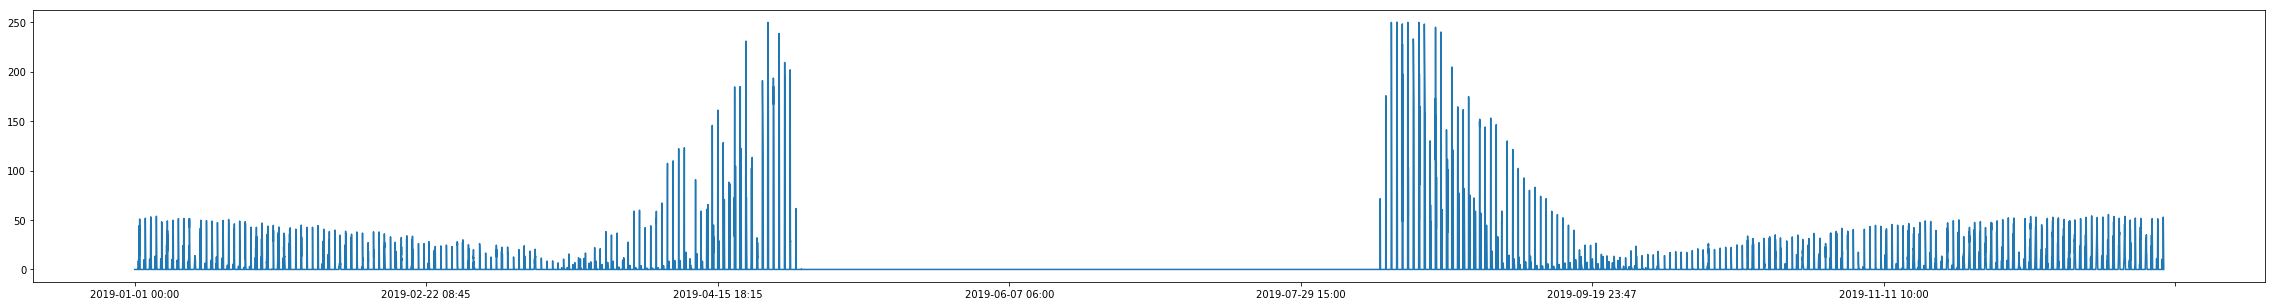

In [333]:
mc.ac.plot(figsize=(40,5))

In [ ]:
First week in Jan

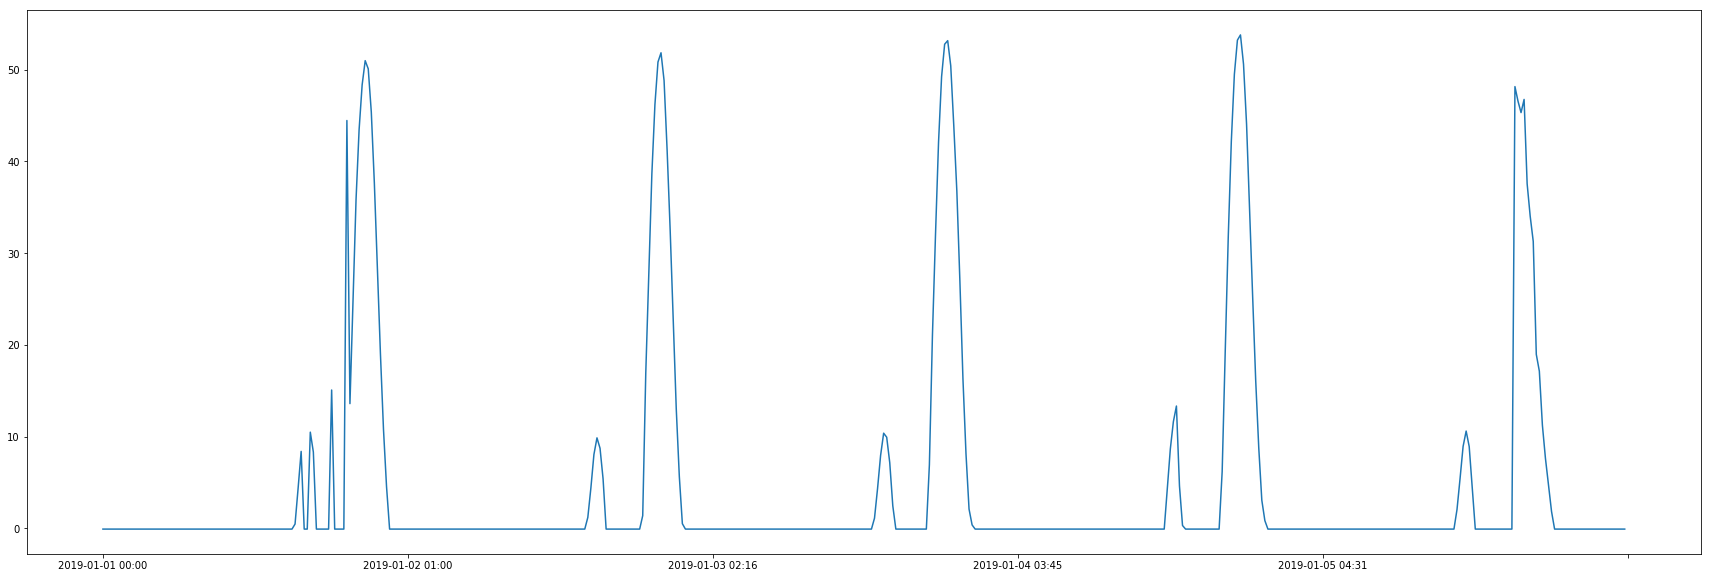

In [334]:
mc.ac[mc.ac.index[:500]].plot(figsize=(30,10));

# this sensor was broken all summer : (

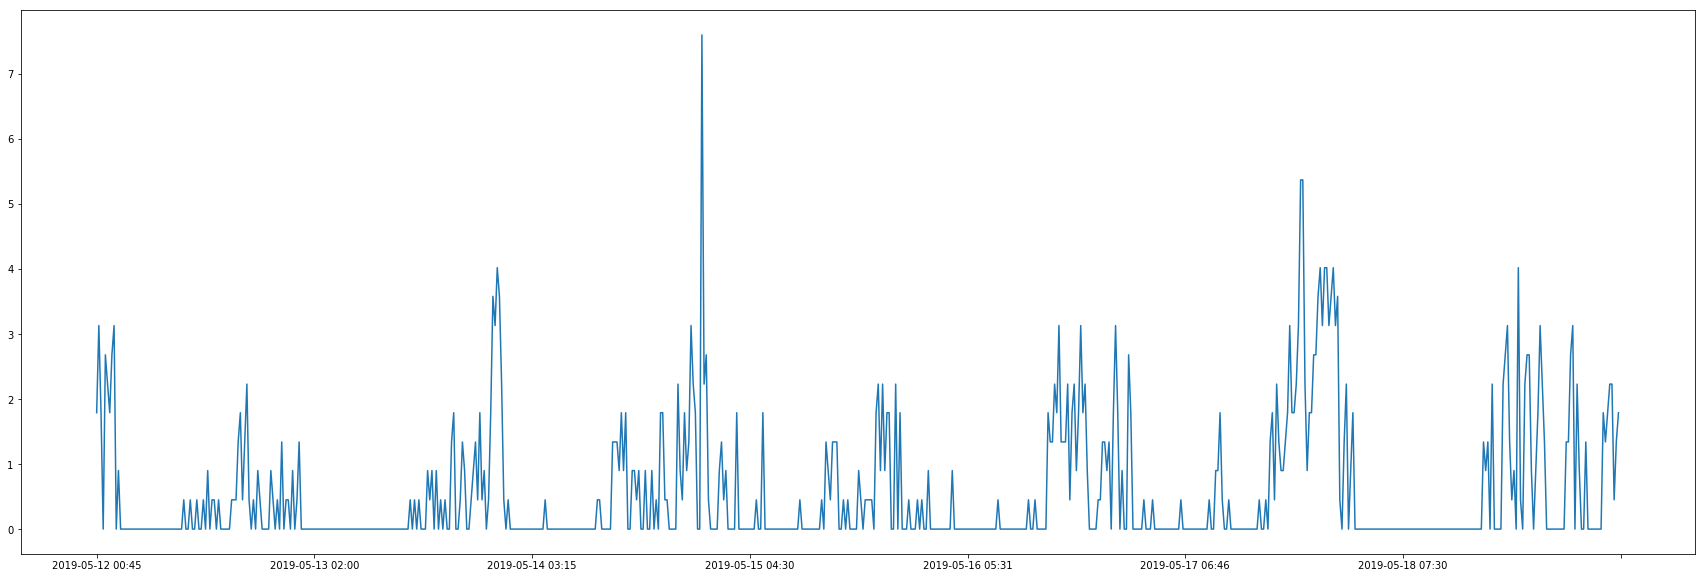

In [340]:
# should be reaching up to 500-1000 on sunny days not 7
data['ghi'][data.index[12500:13200]].plot(figsize=(30,10));

# so the solar power output doesn't look right for summer months

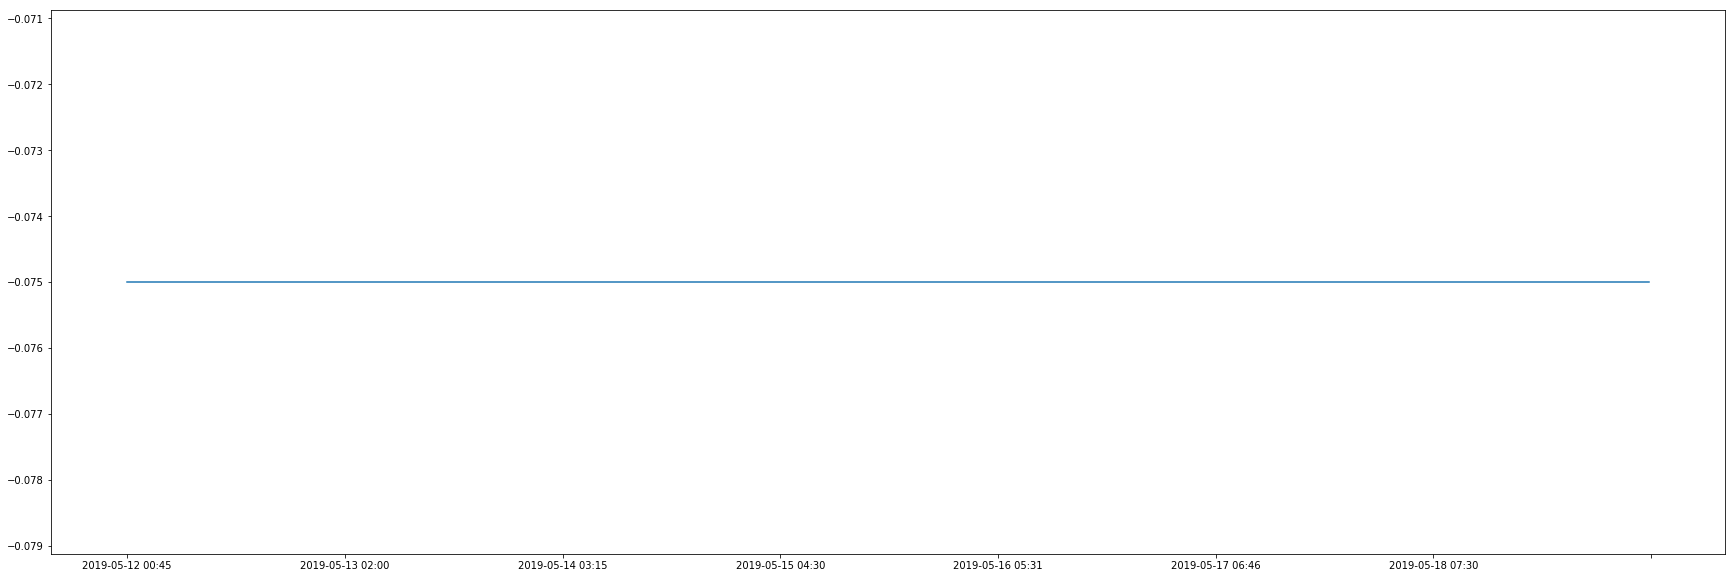

In [336]:
mc.ac[mc.ac.index[12500:13200]].plot(figsize=(30,10));

In [341]:
# my thoughts

One panel should get you 50watt/hours in winter months and 250watt/hours in summer months dou

In [328]:
mc.ac.to_csv('test_plot.csv')